In [2]:
## Loading data from files that don't have headers
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt

 
Location = "loansmall.csv"
df = pd.read_csv(Location)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(194111, 74)

In [4]:
# Chesk for NA's and how menay per column
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       12177
emp_length                       7722
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           106340
purpose                             0
title                              19
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [5]:
# Note that many columns have only NAs in them (194111 per column)
# Drop all columns with all-missing data in all rows, first 

df1=df.dropna(axis=1,how='all')
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [6]:
# Then drop all the remianing rows containing NAs
df2=df1.dropna()
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42630,10089537,11941075,7500,7500,7500.0,36 months,11.99,249.08,B,B3,...,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,0.0,74029.0,10200.0
42667,10159240,12010878,16000,16000,16000.0,60 months,19.22,416.99,D,D4,...,Feb-16,Jan-16,0.0,60.0,1,INDIVIDUAL,0.0,0.0,188654.0,22600.0
42678,10159217,12010856,14125,14125,14125.0,60 months,19.22,368.13,D,D4,...,Feb-16,Jan-16,0.0,50.0,1,INDIVIDUAL,0.0,0.0,164310.0,12900.0
42759,9847366,11699256,12000,12000,12000.0,36 months,13.53,407.40,B,B5,...,Feb-16,Jan-16,0.0,58.0,1,INDIVIDUAL,0.0,0.0,222335.0,9800.0
43029,8978364,10780341,15600,15600,15600.0,36 months,8.90,495.36,A,A5,...,Feb-16,Jan-16,0.0,40.0,1,INDIVIDUAL,0.0,0.0,90719.0,21200.0


In [7]:
# Created new dataframe containing columns we might want to analyze 

df3 = df2.filter(['loan_amnt', 'installment', 'grade', 'sub_grade', 'annual_inc', 'total_acc','int_rate']
, axis=1)
df3.head(3)

,loan_amnt,installment,grade,sub_grade,annual_inc,total_acc,int_rate
42630,7500,249.08,B,B3,59600.0,53.0,11.99
42667,16000,416.99,D,D4,105000.0,38.0,19.22
42678,14125,368.13,D,D4,55000.0,44.0,19.22


In [8]:
# Change "grade" to numeric
def score_to_numeric(x):
    if x=='A':
        return 1
    if x=='B':
        return 2
    if x=='C':
        return 3
    if x=='D':
        return 4
    if x=='E':
        return 5
    if x=='F':
        return 6
    if x=='G':
        return 7
 

In [9]:
df3['grade_val'] = df3['grade'].apply(score_to_numeric)
df3.head(3)

,loan_amnt,installment,grade,sub_grade,annual_inc,total_acc,int_rate,grade_val
42630,7500,249.08,B,B3,59600.0,53.0,11.99,2
42667,16000,416.99,D,D4,105000.0,38.0,19.22,4
42678,14125,368.13,D,D4,55000.0,44.0,19.22,4


In [10]:
# Find correlations between the variables

df3.corr()

,loan_amnt,installment,annual_inc,total_acc,int_rate,grade_val
loan_amnt,1.000000,0.952027,0.407711,0.060991,0.274828,0.274054
installment,0.952027,1.000000,0.428301,0.083963,0.229470,0.228755
annual_inc,0.407711,0.428301,1.000000,0.129500,0.091398,0.070253
total_acc,0.060991,0.083963,0.129500,1.000000,0.075581,0.062300
int_rate,0.274828,0.229470,0.091398,0.075581,1.000000,0.960942
grade_val,0.274054,0.228755,0.070253,0.062300,0.960942,1.000000


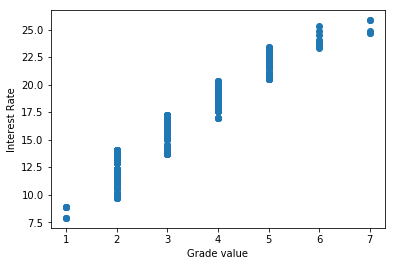

In [11]:
#It appears that int_rate is correlated with grade_value
# and to a lesser extent to loan_amnt, annual_inc or total_acc
# At each grade, there is a range of interest rates possible
# Let's visualize

plt.scatter(df3.grade_val, df3.int_rate)
plt.xlabel('Grade value')
plt.ylabel('Interest Rate')

plt.show()

In [12]:
# Created a pivot table to show the averages for the various parameters
# by loan grade


table = pd.pivot_table(df3, values=['int_rate', 'loan_amnt', 'annual_inc', 'installment', 'total_acc'], index=['grade'],
                    aggfunc={'int_rate': np.mean,
                             'loan_amnt': np.mean,
                             'annual_inc': np.mean,
                             'installment': np.mean,
                             'total_acc': np.mean})
table.head() 

,annual_inc,installment,int_rate,loan_amnt,total_acc
grade,,,,,
A,80484.875000,457.707500,8.525000,14500.000000,26.625000
B,69336.935448,363.594759,12.136966,11113.103448,27.772414
C,71742.890756,364.558235,15.501681,12214.915966,27.882353
D,70922.304878,402.092561,18.518293,12825.304878,27.524390
E,83089.550000,514.253000,21.840250,17662.500000,28.550000


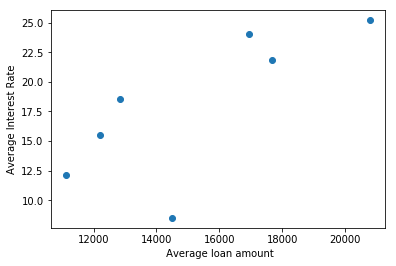

In [14]:
# Visualize some of the parameters
plt.scatter(table.loan_amnt, table.int_rate)

plt.xlabel(' Average loan amount')
plt.ylabel('Average Interest Rate')

plt.show()

In [16]:
# Try the new regression method, using int_rate as dependent variable

from sklearn.linear_model import LinearRegression
X = table.drop('int_rate', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm.fit(X, table.int_rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 60.015560125025814
Number of coefficients: 4


In [19]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,annual_inc,-0.000910
1,installment,-0.135978
2,loan_amnt,0.006176
3,total_acc,-0.143445


In [22]:
# Apply regression the other way to check for a linear relationship
# between average int_rate and average loan_amnt

import statsmodels.formula.api as sm
result = sm.ols(formula='int_rate ~ loan_amnt -1  ', data=table).fit()
result.summary()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           2.37e-05
Time:                        00:03:01   Log-Likelihood:                -19.410
No. Observations:                   7   AIC:                             40.82
Df Residuals:                       6   BIC:                             40.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan_amnt      0.0012      0.000     11.687      0.000       0.001       0.001
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.910
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.348
Skew:                          -1.358   Prob(JB):                        0.309
Kurtosis:                       3.823   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

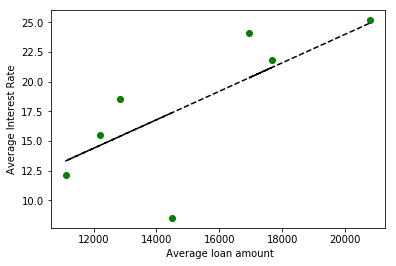

In [23]:
# Visualize the fit line
x = table.loan_amnt
y = table.int_rate 
 
ln_fit=0.0012*x
plt.plot(x, y, 'go', x, ln_fit , '--k')

plt.xlabel(' Average loan amount')
plt.ylabel('Average Interest Rate')
plt.show() 

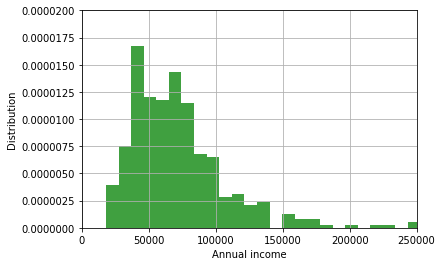

In [24]:
# Let's visualize

x=df3['annual_inc']
n, bins, patches = plt.hist(x, 30, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Annual income')
plt.ylabel('Distribution')

plt.axis([0, 250000, 0, 0.00002])
plt.grid(True)

plt.show()

In [25]:
#Let's look at the annual income, byloan grade and by income range
# Create a new table for Grade A loans

dfA = df3[df3['grade'] == "A"]
dfA.head(3)

,loan_amnt,installment,grade,sub_grade,annual_inc,total_acc,int_rate,grade_val
43029,15600,495.36,A,A5,60000.0,19.0,8.9,1
48546,12000,375.49,A,A4,89000.0,33.0,7.9,1
48805,15000,469.36,A,A4,42000.0,33.0,7.9,1


In [27]:
# looked at the annual income, by loan grade and by income range
# Binned the annual income in n_equal_bins between min and max

first_edge, last_edge = min(dfA.annual_inc), max(dfA.annual_inc)
n_equal_bins = 10  # for example
bin_edges = np.linspace(start=first_edge, stop=last_edge,
                      num=n_equal_bins + 1, endpoint=True)
bin_edges[1:10]

array([ 57800.,  73600.,  89400., 105200., 121000., 136800., 152600.,
       168400., 184200.])

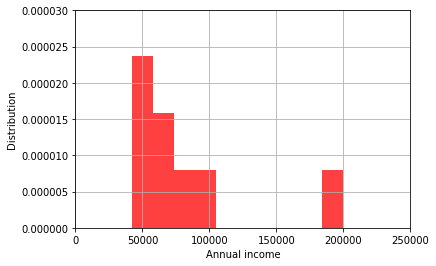

In [32]:
# There is not much variation in int_rate with income for this "A" grade loans
# Let's visualize

x=dfA['annual_inc']
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='red', alpha=0.75)

plt.xlabel('Annual income')
plt.ylabel('Distribution')

plt.axis([0, 250000, 0, 0.00003])
plt.grid(True)

plt.show()

In [29]:
# Created a pivot table to show the averages for the various parameters
# by loan grade

income_bins = pd.cut(dfA['annual_inc'], bin_edges) 
tableA = pd.pivot_table(dfA, values=['int_rate', 'loan_amnt', 'annual_inc', 'installment', 'total_acc'], index=[income_bins],
                    aggfunc={'int_rate': np.mean,
                             'loan_amnt': np.mean,
                             'annual_inc': np.mean,
                             'installment': np.mean,
                             'total_acc': np.mean})
tableA.head()

,annual_inc,installment,int_rate,loan_amnt,total_acc
annual_inc,,,,,
"(42000.0, 57800.0]",45439.5,450.90,8.9,14200,25.0
"(57800.0, 73600.0]",65000.0,406.45,8.9,12800,20.0
"(73600.0, 89400.0]",89000.0,375.49,7.9,12000,33.0
"(89400.0, 105200.0]",92000.0,476.30,8.9,15000,24.0
"(184200.0, 200000.0]",200000.0,625.81,7.9,20000,33.0


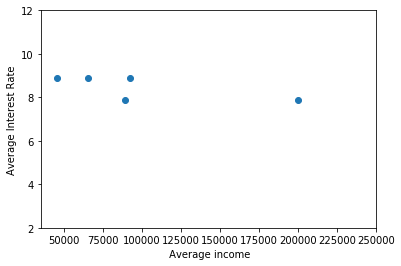

In [33]:
plt.scatter(tableA.annual_inc, tableA.int_rate)

plt.xlabel(' Average income')
plt.ylabel('Average Interest Rate')
plt.axis([35000, 250000, 2, 12])
plt.show()

In [35]:
# Trie a pivot table by state and grade

tableS = pd.pivot_table(df2, values=['int_rate', 'loan_amnt'], index=['addr_state', 'grade'],
                    aggfunc={'int_rate': [min, max, np.mean],
                             'loan_amnt': [min, max, np.mean] })
tableS.head(10) 

int_rate                loan_amnt                  
                      max    mean    min       max     mean      min
addr_state grade                                                    
AL         B        13.67  13.670  13.67   10000.0  10000.0  10000.0
           C        16.20  15.590  14.98   12000.0  11000.0  10000.0
AR         A         8.90   8.900   8.90    8400.0   8400.0   8400.0
           C        17.27  15.785  14.30   10000.0   7000.0   4000.0
           D        16.99  16.990  16.99    5375.0   4312.5   3250.0
           F        24.08  24.080  24.08   18000.0  18000.0  18000.0
AZ         B        14.09  12.854  11.99   12000.0   8735.0   3000.0
           C        17.27  15.632  13.98   25250.0  16905.0   4725.0
           E        22.40  22.190  21.98   35000.0  25500.0  16000.0
           G        24.70  24.700  24.70   20000.0  20000.0  20000.0

In [ ]:
# Any other ideas what to shoot for, in our group project???